In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Load dataset (assuming it's in the same folder)
data = pd.read_csv("emails.csv")

# Display first few rows
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


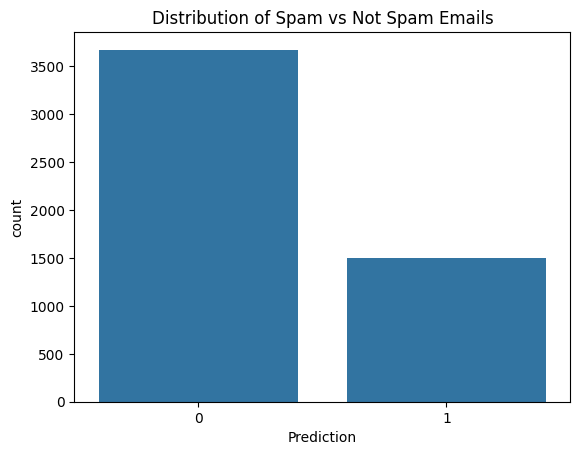

In [4]:
# Check for missing values
data.isnull().sum()

# View data info
data.info()

# Check label distribution
sns.countplot(x='Prediction', data=data)
plt.title("Distribution of Spam vs Not Spam Emails")
plt.show()

In [7]:
X = data.drop(columns=['Email No.', 'Prediction'])
y = data['Prediction']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [10]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [11]:
# KNN Evaluation
print("KNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# SVM Evaluation
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

KNN Model Performance:
Accuracy: 0.8628019323671497
[[646  93]
 [ 49 247]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035


SVM Model Performance:
Accuracy: 0.9594202898550724
[[715  24]
 [ 18 278]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



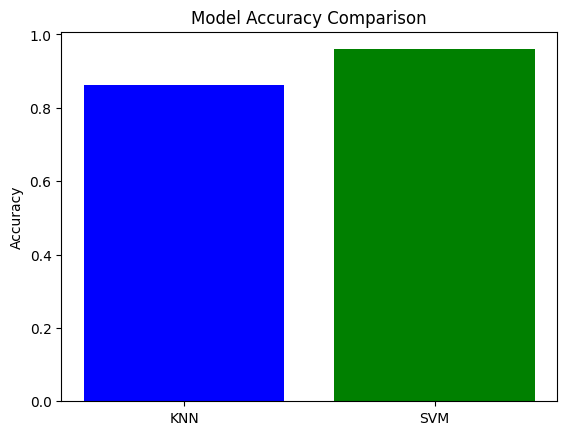

In [12]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Bar plot comparison
plt.bar(['KNN', 'SVM'], [acc_knn, acc_svm], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()